# Nobel prizes

## 1. Loading the data
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>


In [72]:
# Loading in required libraries: you will need pandas, seaborn and numpy
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Reading in the Nobel Prize data
nobel = pd.read_csv('./datasets/nobel.csv')

# Explore the data - are there missing values? How many entries do we have?
# ... YOUR CODE FOR TASK 1 ...
print(nobel.shape)
print('-------------------------------------------------------------')
print(nobel.isnull().sum())

(911, 18)
-------------------------------------------------------------
year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64


## Answer:
* The nobels dataset we're working with here has a lot of missing data in multiple columns as seen above.

* The total number of entries is 911 and we have 18 columns.



## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

Number of possibly shared prizes:  244
------------------------------------------------------------------
sex
Female     49
Male      836
dtype: int64


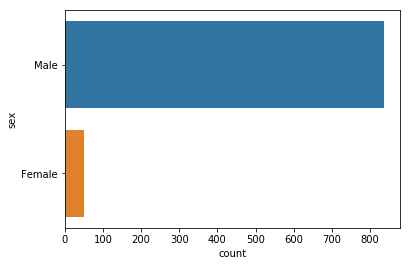

------------------------------------------------------------------
Top 10 countries
<class 'pandas.core.series.Series'>


Text(0.5, 0, 'count')

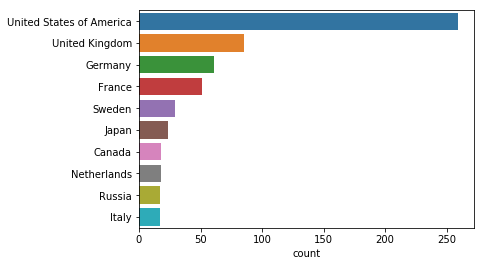

In [73]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...
print('Number of possibly shared prizes: ', len(nobel[nobel.organization_country.isnull()]))
print('------------------------------------------------------------------')
# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...
print(nobel.groupby(by= 'sex').size())

sns.countplot(y='sex', data=nobel)
plt.show()
print('------------------------------------------------------------------')
# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...
print('Top 10 countries')
top10= nobel['birth_country'].value_counts()[:10]
print(type(top10))

sns.barplot(y=top10.index, x=top10)
plt.xlabel('count')




Which countries win most often?

# Answer

The USA, UK and Germany win the most. The bar plot above shows clearly the representation of each of the top 10 nations.

* Men clearly have the lead here, winning almost 17 times more awards as their female counterparts. 

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>
    

In [74]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel.birth_country == 'United States of America'
nobel['decade'] = nobel['year'].apply(lambda year: year - (year %10))

#prop_usa_winners= nobel.usa_born_winner.sum()/ len(nobel)
prop_usa_winners= nobel.usa_born_winner.mean()

#nobel['usa_prop']= prop_usa_winners
#print(nobel.decade)
#print(prop_usa_winners)
# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...

print('overall USA dominance is: ', prop_usa_winners)
print('-----------------------------------------------------')
usa_by_decade= nobel.usa_born_winner.groupby(nobel.decade).mean()
usa_by_decade= usa_by_decade.to_frame('proportion')

usa_by_decade['decade']= usa_by_decade.index
usa_by_decade= usa_by_decade.reset_index(drop=True)
#usa_by_decade.drop_index()

print(type(usa_by_decade))
print(usa_by_decade)

overall USA dominance is:  0.2843029637760702
-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
    proportion  decade
0     0.017544    1900
1     0.075000    1910
2     0.074074    1920
3     0.250000    1930
4     0.302326    1940
5     0.291667    1950
6     0.265823    1960
7     0.317308    1970
8     0.319588    1980
9     0.403846    1990
10    0.422764    2000
11    0.292683    2010


## Answer:
* The USA started to dominate the charts in the 1930s as we see a 3.5x jump from 7% to 25% domination.
* A 14.2 times increase from the 1990s.
### Well done USA
<p> <img src=USA.jpg></p>


## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

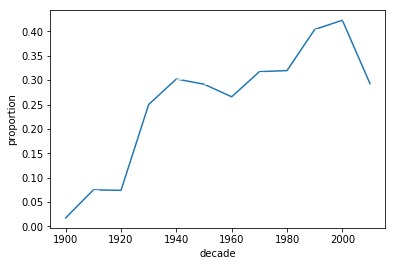

In [75]:
#using seaborn, plot the proportion of US winners by decade
sns.lineplot(x='decade', y='proportion', data= usa_by_decade, marker=True)


What can you conclude from the graph?

# Answer
* The United States of America has been producing more and more intellectuals eversince the early 1920s. 
* Interesting how, after every World War (1914 and 1945), you see huge spikes in the proportion of awards going to the USA. I beleieve it is due to funding to Research, which tends to be a lagging indicator. 

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>



```
# This is formatted as code
```

 Interpret your plot here

all time proportion of female winners:  0.05378704720087816
----------------------------------------------------------
   decade    category  proportion
0    1900   Chemistry    0.000000
1    1900  Literature    0.100000
2    1900    Medicine    0.000000
3    1900       Peace    0.071429
4    1900     Physics    0.076923


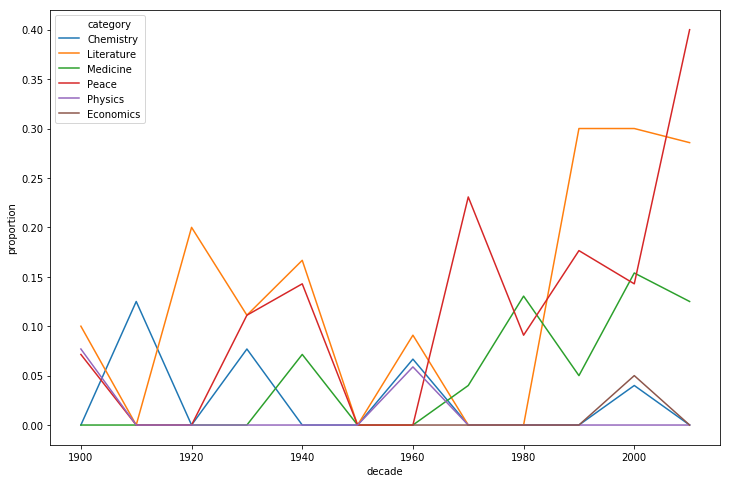

In [87]:

# Calculating the proportion of female laureates per decade

nobel['female_winner'] = nobel.sex=='Female'
prop_female_winners = nobel.female_winner.mean()

# Plot proportion of female winners by decade, grouped by prize category (physics, medicine, etc)
# ... YOUR CODE FOR TASK 5 ...
print('all time proportion of female winners: ',prop_female_winners)
print('----------------------------------------------------------')

'''df_female_winners= nobel['female_winner'].groupby([nobel.decade, nobel.category]).mean()
df_female_winners= df_female_winners.to_frame('proportion')
df_female_winners['decade']= df_female_winners.index
df_female_winners= df_female_winners.reset_index(drop= True)'''


df_female_winners= nobel['female_winner'].groupby([nobel.decade, nobel.category]).mean()
df_female_winners= df_female_winners.to_frame('proportion')
#df_female_winners['decade']= df_female_winners.index
df_female_winners= df_female_winners.reset_index()

print(df_female_winners.head())

list_cats= df_female_winners.category.unique()

'''for each in list_cats:
    print(df_female_winners[df_female_winners.category== each]).count()'''

#sns.lineplot(x='decade', y='proportion', data= df_female_winners)

#df_female_winners.plot(x= 'decade', y='proportion')
'''dict_categories= df_female_winners.category.unique()

for each in dict_categories:
    subject= df_female_winners[df_female_winners['category']== each]
    #plt.plot(x='decade', y='proportion', data=subject,label= each)
    #subject.plot(x='decade', y='proportion', label=each)
    sns.lineplot(x='decade', y='proportion', data=subject)'''
plt.figure(figsize=(12,8))
sns.lineplot(x='decade', y='proportion', hue='category' ,data=df_female_winners)


# Answer
There has been a huge imbalance as women hardly ever won prizes. It is more evident in certain fields.

The most imbalanced are (in that order):
<ol>
  <li>Physics</li>
  <li>Economics</li>
  <li>Chemistry</li>
  <li>medicine </li>
  <li>peace</li>
  <li>literature</li>
</ol>

## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>


In [7]:
# Picking out the first woman to win a Nobel Prize
# ... YOUR CODE FOR TASK 6 ...
first_woman= nobel.loc[(nobel.sex=='Female')].sort_values('year').head(1).full_name
print('The first woman to win was', first_woman.values)

The first woman to win was ['Marie Curie, née Sklodowska']


<p><img src='marie curie.jpg' height="250" width="300"></p>

## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [93]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 7 ...
times_won= nobel.full_name.value_counts()
times_won= nobel.full_name.value_counts()


print(times_won[times_won >=2])
print('---------------------------------------------------------------------')
print(times_won[times_won >1].count(), ' People won more than once.')

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
John Bardeen                                                                         2
Marie Curie, née Sklodowska                                                          2
Frederick Sanger                                                                     2
Linus Carl Pauling                                                                   2
Name: full_name, dtype: int64
---------------------------------------------------------------------
6  People won more than once.





How many people have received 2 or more prizes?

# Answer
6 People in total have won the nobel prize more than once.

## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

The average age for winners is:  59.453001132502834
The standard deviation is:  12.39929042786365
The median age is:  60.0


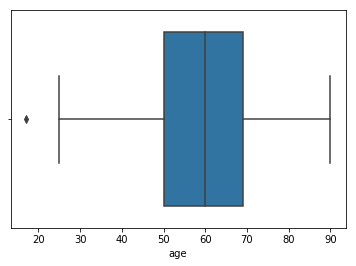

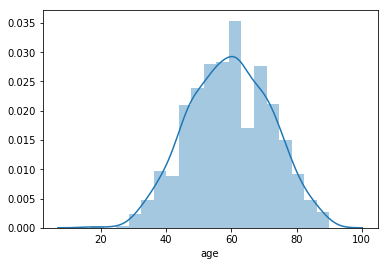

In [95]:
# Converting birth_date from String to datetime
from datetime import time
nobel['birth_date'] = pd.to_datetime(nobel.birth_date)

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel.year- nobel.birth_date.dt.year

# What is the mean age of winners and it's standard devation? What is the median age?

print('The average age for winners is: ',nobel.age.mean())
print('The standard deviation is: ', nobel.age.std())

print('The median age is: ', nobel.age.median())
sns.boxplot(x='age', data=nobel)
plt.show()
sns.distplot(nobel.age.dropna())

# Answer:
* Above, we can see that on average, nobel prize winners are 60 years of age.
* You have outliers such as Malala at the age of 17.
* but relativelly, almost normally distributed around 60.


## 9. Age differences between prize categories


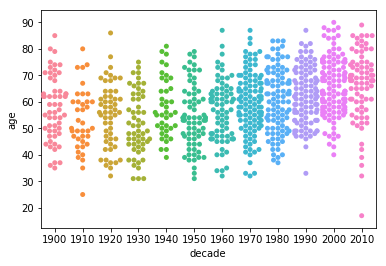

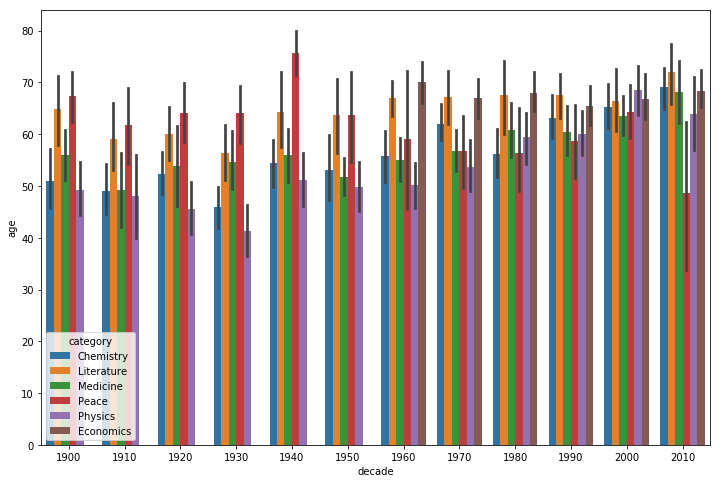

In [56]:
#Plot the age of nobel candidates by decade
#YOUR CODE FOR TASK 9 ...
#f, axes = plt.subplots(2, 3)

sns.swarmplot(x='decade', y='age', data=nobel)
# Plot the age of nobel candidates by decade and prize category

#dict_categories= nobel.category.unique()
#plt.subplot(2, 3, 6)
'''for each in dict_categories:
    subject= nobel[nobel['category']== each]
    #plt.plot(x='decade', y='proportion', data=subject,label= each)
    #subject.plot(x='decade', y='proportion', label=each)
    plt.axes([0.05, 0.05, 0.425, 0.9])
    #sns.scatterplot(x='decade', y='age', data=subject)
    plt.scatter(subject.decade, subject.age, label=each)

plt.show()'''
plt.show()
plt.figure(figsize=(12,8))
#for each in range(len(dict_categories)):
#    sns.barplot(x='decade', y='age', hue='category', data=nobel, ax= axes[each])

sns.barplot(x='decade', y='age', hue='category', data=nobel)
#sns.catplot(x='decade', y='age', col='category', aspect=.6, data=nobel)


#sns.catplot(x='Q5',kind='count', col='Q16', aspect=.6, data=momible)

#sns.FacetGrid(data, row='Country', col='AgeGroup', hue='')
#sns.FacetGrid(data=nobel,row='decade', col='age', hue='category')

# Answer
* Generally the age of people who win the prizes is above 50.
* More recently, the age of winners has become more dispersed with outliers such as Malala at 17.
* The swarmplot becomes more and more dense over the decades, showing how we are having more and more winners overtime. with probably plenty of experience in their fields.
* After the 1940s, we see a spike in the number of awards. Probably as countries were busy investing in wars and the fruits of their investments came later. I'll explain more below.

What can you conclude about the age at which people win different types of Nobel Prizes?

## 10. Oldest and youngest winners
<p>In the peace category there is a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [15]:
#youngest= nobel[nobel.age.notnull()].sort_values('birth_date').min()[['full_name', 'age']].values

#oldest= nobel.sort_values('age').max()[['full_name', 'age']].values

oldest= nobel[nobel.age.notnull()].sort_values('age')[['full_name', 'age']].tail(1)

youngest= nobel[nobel.age.notnull()].sort_values('age')[['full_name', 'age']].head(1)

print('The youngest is ', youngest.full_name.values, youngest.age.values)

print('the oldest is: ', oldest.full_name.values, oldest.age.values)


#print(nobel.loc[nobel.full_name==''])


The youngest is  ['Malala Yousafzai'] [17.]
the oldest is:  ['Leonid Hurwicz'] [90.]


<h1>Malala Yousafzai, 17 years</h1>
<p><img src='./malala.jpg'></p>
<h2>Leonid Hurwicz, 90 years</h2>
<p><img src='leonid-hurwicz.jpg'></p>


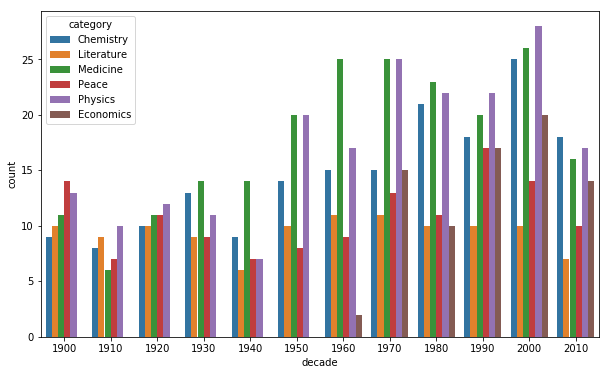

In [44]:
#organization= nobel[nobel.laureate_type=='Organization']
#print(organization.full_name)
usa_by_category= nobel[nobel.birth_country=='United States of America']
usa_by_category= nobel[['category', 'decade']]

plt.figure(figsize=(10,6))
sns.countplot(x='decade',hue='category' ,data=usa_by_category)


# Theory of why USA leads
The main reason why I the USA leads is because they invest the most in Research and Development.
* Most investment is done around times of war.
* Investing in basic science tends to pay off over a long time, so it is a lagging indicator.
* This shows by how many prizes are won by the USA in Physics, Chemistry and Medicine, especially after World War 1 and * World war 2 in 1914 and 1945 respectively.

### Below I tried importing data from the World Bank to show how much the USA is spending on Research and Development compared to other countries and the world. Link below.

https://data.worldbank.org/indicator/GB.XPD.RSDV.GD.ZS?locations=US-1W-GB-DE-FR

In [96]:
research= pd.read_csv('re.csv', error_bad_lines=False, sep='')
print(research.shape)
reasearch= research.dropna(thresh=36)
research



ValueError: only single character unicode strings can be converted to Py_UCS4, got length 0

## Congratulations! You've reached the end of the challenge!